In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wrf
from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np

In [2]:
ls /mnt/sda2/exp3_llj/

g1_les_wrfout_d01_20130302.nc  n1_wrfout_d01_20130302.nc
g1_les_wrfout_d02_20130302.nc  n1_wrfout_d02_20130302.nc
g1_les_wrfout_d03_20130302.nc  n1_wrfout_d03_20130302.nc
n1_les_wrfout_d01_20130302.nc  n2_wrfout_d01_20130302.nc
n1_les_wrfout_d02_20130302.nc  n2_wrfout_d02_20130302.nc
n1_les_wrfout_d03_20130302.nc  n2_wrfout_d03_20130302.nc


In [3]:
model='g1_les'
run='les'
domain='d01'
print('/mnt/sda2/exp3_llj/'+model+'_wrfout_'+domain+'_20130302.nc')

/mnt/sda2/exp3_llj/g1_les_wrfout_d01_20130302.nc


In [4]:
wrflist = Dataset('/mnt/sda2/exp3_llj/'+model+'_wrfout_'+domain+'_20130302.nc')
uv, wdir = getvar(wrflist, "uvmet_wspd_wdir", units="m s-1", timeidx=ALL_TIMES)
tvv = getvar(wrflist, "tv", units="degC", timeidx=ALL_TIMES)
tvv.shape

(55, 31, 83, 83)

In [5]:
tvv[0,0,36,36];
#XLONG    float32 -103.773
#XLAT     float32 19.2801

In [6]:
wrftime = getvar(wrflist, "times", timeidx=ALL_TIMES)
utc2loc = np.timedelta64(6,'h')
wrftimes = pd.to_datetime(wrftime.values)-utc2loc
date1, date2 = wrftimes[0], wrftimes[wrftimes.size-1]
print(wrftimes.size, date1, date2)

55 2013-03-01 18:00:00 2013-03-04 00:00:00


In [7]:
# Interpolate levels
interp_levels = [.020, .030, .040, .050, .100, .150, .200,
                 .250, .300, .350]

interp_uv = vinterp(wrflist, field=uv, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, field_type='z')

interp_wdir = vinterp(wrflist, field=wdir, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, field_type="z")

interp_tv = vinterp(wrflist, field=tvv, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, field_type="z")

interp_uv.shape

(55, 10, 83, 83)

In [8]:
uv10, wdir10 = getvar(wrflist, "uvmet10_wspd_wdir", units="m s-1", timeidx=ALL_TIMES)
tv10 = getvar(wrflist, "tv", units="degC", timeidx=ALL_TIMES)

w50 = wrfuv[:,1].resample(Time="30Min").mean() 
t50 = wrftv[:,1].resample(Time="30Min").mean() 
w100 = wrfuv[:,2].resample(Time="30Min").mean() 
t100 = wrftv[:,2].resample(Time="30Min").mean() 
w150 = wrfuv[:,3].resample(Time="30Min").mean() 
t150 = wrftv[:,3].resample(Time="30Min").mean() 
w200 = wrfuv[:,4].resample(Time="30Min").mean() 
t200 = wrftv[:,4].resample(Time="30Min").mean() 
w250 = wrfuv[:,4].resample(Time="30Min").mean() 
t250 = wrftv[:,4].resample(Time="30Min").mean() 
w300 = wrfuv[:,5].resample(Time="30Min").mean() 
t300 = wrftv[:,5].resample(Time="30Min").mean() 


In [9]:
wrfuv = interp_uv[:,:,36,36];
wrfdd = interp_wdir[:,:,36,36];
wrftv = interp_tv[:,:,36,36];
dd = pd.read_pickle('sodar_dd.pk')
sp = pd.read_pickle('sodar_sp.pk')
tv = pd.read_pickle('sodar_tv.pk')

In [10]:
w50 = wrfuv[:,1]
t50 = wrftv[:,1]
w100 = wrfuv[:,2]
t100 = wrftv[:,2]
w150 = wrfuv[:,3]
t150 = wrftv[:,3]
w200 = wrfuv[:,4]
t200 = wrftv[:,4]
w250 = wrfuv[:,4]
t250 = wrftv[:,4]
w300 = wrfuv[:,5]
t300 = wrftv[:,5]

s50  = sp['spd_50' ]['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s100 = sp['spd_100']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s150 = sp['spd_150']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s200 = sp['spd_200']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s250 = sp['spd_250']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s300 = sp['spd_300']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s350 = sp['spd_350']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s400 = sp['spd_400']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s450 = sp['spd_450']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s500 = sp['spd_500']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values

tv50  = tv['spd_50' ]['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv100 = tv['spd_100']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv150 = tv['spd_150']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv200 = tv['spd_200']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv250 = tv['spd_250']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv300 = tv['spd_300']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv350 = tv['spd_350']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv400 = tv['spd_400']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv450 = tv['spd_450']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv500 = tv['spd_500']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values

In [11]:
sp['spd_50']['2013-03-01 18:00':'2013-03-04 00:00'][::2].shape

(55,)

In [12]:
timelabel = wrftimes[:]
print(s50.shape, w50.shape, timelabel.shape)
print(timelabel[0], timelabel[54])

(55,) (55,) (55,)
2013-03-01 18:00:00 2013-03-04 00:00:00


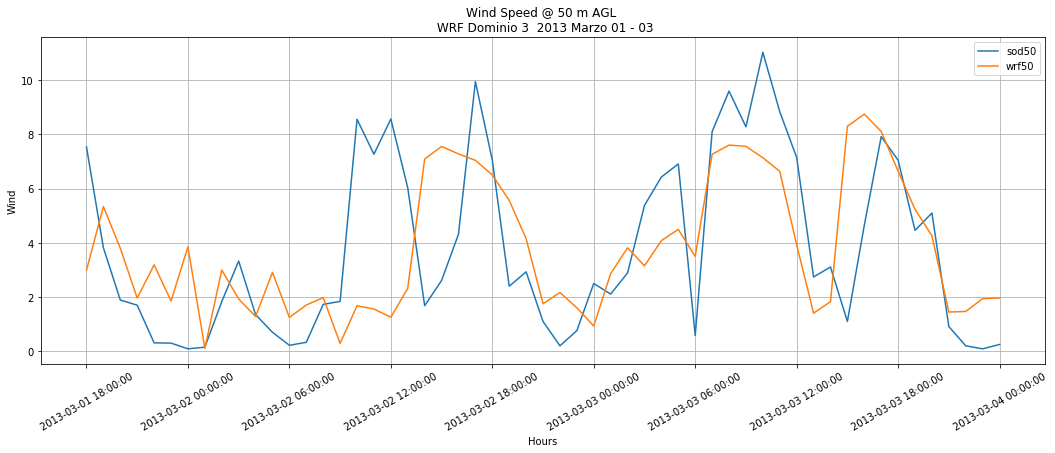

In [13]:
fig = plt.figure(figsize=[18,6])
s50 = sp['spd_50']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
plt.plot(s50, label='sod50')
plt.plot(w50, label='wrf50')

plt.title('Wind Speed @ 50 m AGL \n WRF Dominio 3  2013 Marzo 01 - 03')
plt.ylabel('Wind')
plt.xlabel('Hours')

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
# xticks(locs, [labels], **kwargs) 
plt.xticks(np.arange(0,timelabel.size,6),timelabel[::6], rotation=30)
plt.show()

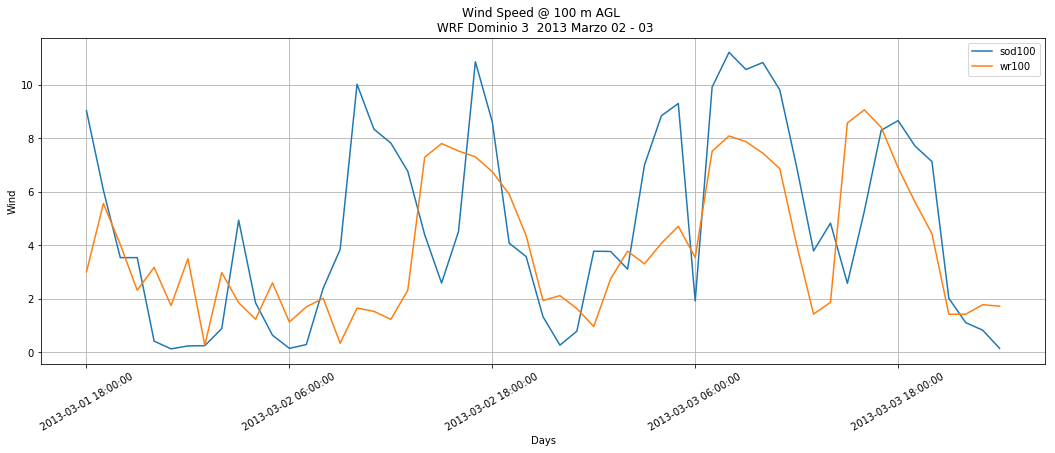

In [14]:
fig = plt.figure(figsize=[18,6])
plt.plot(s100, label='sod100')
plt.plot(w100, label='wr100')

plt.title('Wind Speed @ 100 m AGL \n WRF Dominio 3  2013 Marzo 02 - 03')
plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30)

plt.show()

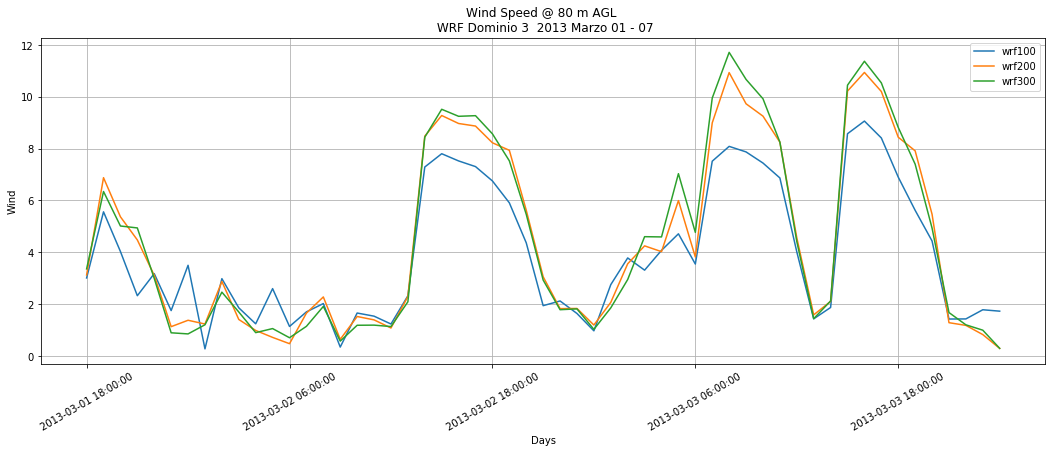

In [15]:
import pandas as pd
fig = plt.figure(figsize=[18,6])

plt.plot(w100, label='wrf100')
plt.plot(w200, label='wrf200')
plt.plot(w300, label='wrf300')

plt.title('Wind Speed @ 80 m AGL \n WRF Dominio 3  2013 Marzo 01 - 07')
plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30)

plt.show()

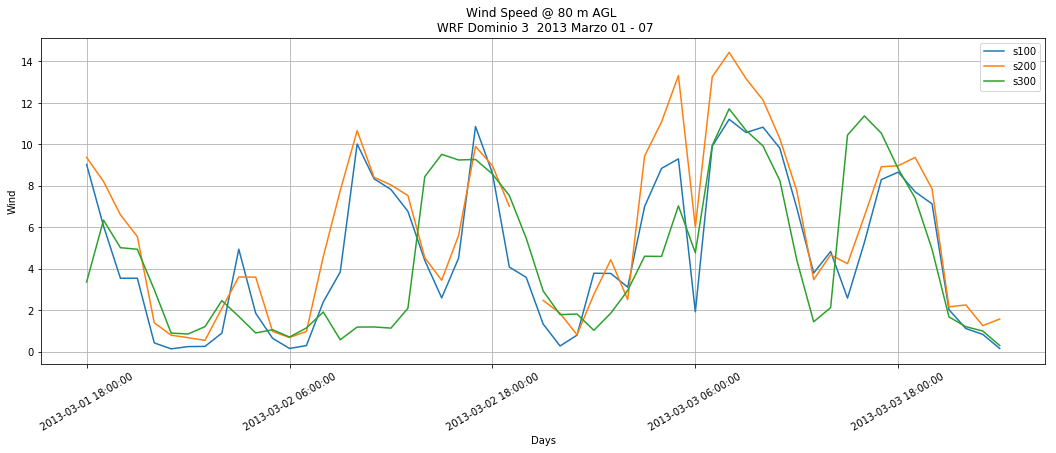

In [16]:
import pandas as pd
fig = plt.figure(figsize=[18,6])

plt.plot(s100, label='s100')
plt.plot(s200, label='s200')
plt.plot(w300, label='s300')

plt.title('Wind Speed @ 80 m AGL \n WRF Dominio 3  2013 Marzo 01 - 07')
plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30)

plt.show()

In [17]:
sodss = sp['2013-03-01 18:00':'2013-03-04 00:00'].T;
sodtv = tv['2013-03-01 18:00':'2013-03-04 00:00'].T;
sodtv;

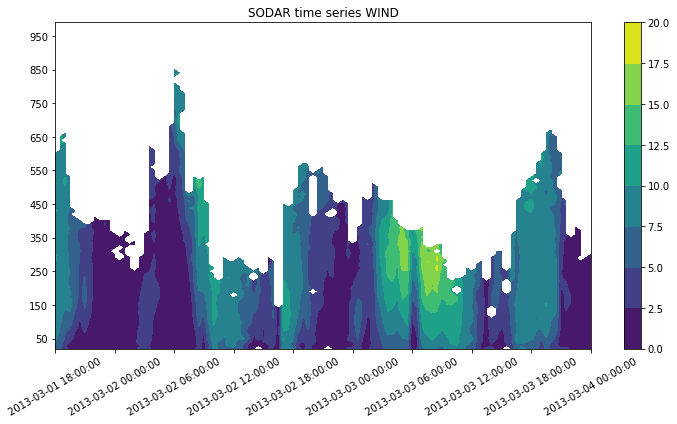

In [18]:
plt.figure(figsize=(12,6))
cont = plt.contourf(sodss)
plt.colorbar(cont)
plt.yticks(np.arange(3,98,10), np.arange(50,1001,100));
plt.xticks(np.arange(0,timelabel.size*2,12),timelabel[::6], rotation=30);
plt.title('SODAR time series WIND');

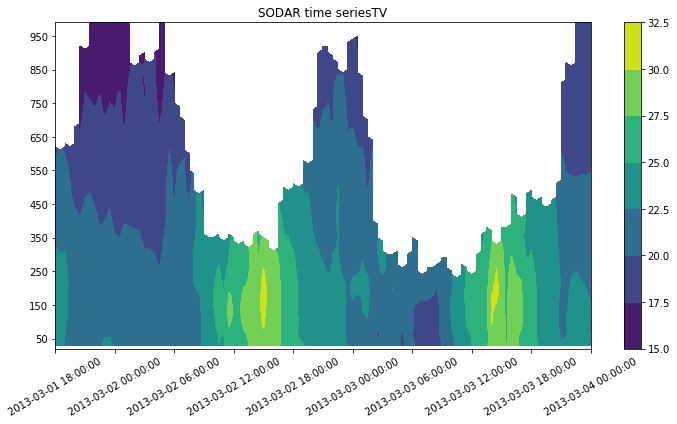

In [19]:
plt.figure(figsize=(12,6))
cont = plt.contourf(sodtv)
plt.colorbar(cont)
plt.yticks(np.arange(3,98,10), np.arange(50,1001,100));
plt.xticks(np.arange(0,timelabel.size*2,12),timelabel[::6], rotation=30);
plt.title('SODAR time seriesTV');

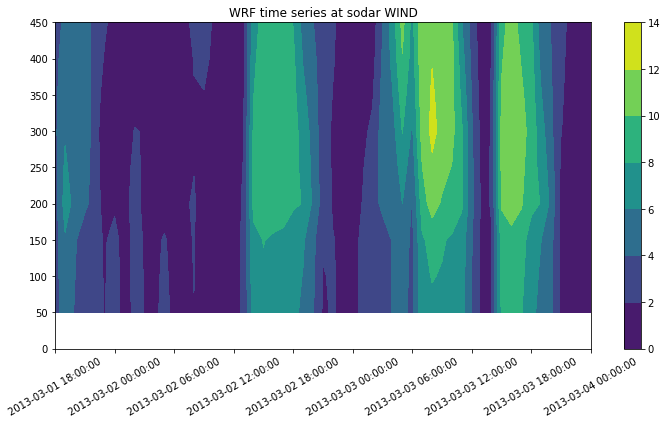

In [20]:
plt.figure(figsize=(12,6))
cont = plt.contourf(wrfuv.T)
plt.colorbar(cont)
plt.xticks(np.arange(0,timelabel.size,6),timelabel[::6], rotation=30);
plt.yticks(np.arange(0,10,1), np.arange(0,501,50));
plt.title('WRF time series at sodar WIND');

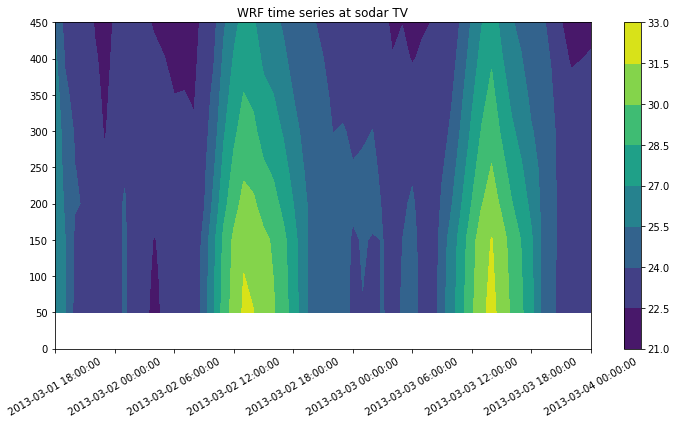

In [29]:
plt.figure(figsize=(12,6))
cont = plt.contourf(wrftv.T)
plt.colorbar(cont)
plt.xticks(np.arange(0,timelabel.size,6),timelabel[::6], rotation=30);
plt.yticks(np.arange(0,10,1), np.arange(0,501,50));
plt.title('WRF time series at sodar TV');

In [119]:
lats = getvar(wrflist, "lat", timeidx=20)#[:,0]
lons = getvar(wrflist, "lon", timeidx=20)#[0,:]


In [120]:
print(lats.shape, lons.shape, z.shape)

(83, 83) (83, 83) (31, 83)


In [125]:
z

<xarray.DataArray 'height' (bottom_top: 31, south_north: 83, west_east: 83)>
array([[[    29.544561,     29.563372, ...,     52.160927,     49.942654],
        [    29.546865,     29.572584, ...,    104.590485,     99.564255],
        ..., 
        [    95.374702,    201.787399, ...,   1912.752808,   1868.23938 ],
        [   116.730087,    217.683487, ...,   1886.934448,   1857.254517]],

       [[   101.510414,    101.575188, ...,    123.386276,    121.033119],
        [   101.519737,    101.61367 , ...,    175.725372,    170.562881],
        ..., 
        [   166.032944,    271.923431, ...,   1977.737061,   1933.328491],
        [   187.243225,    287.70462 , ...,   1952.003418,   1922.387573]],

       ..., 
       [[ 19201.703125,  19201.666016, ...,  19209.34375 ,  19207.634766],
        [ 19201.337891,  19202.005859, ...,  19215.357422,  19213.535156],
        ..., 
        [ 19197.539062,  19211.244141, ...,  19420.798828,  19414.734375],
        [ 19198.919922,  19211.458984, 

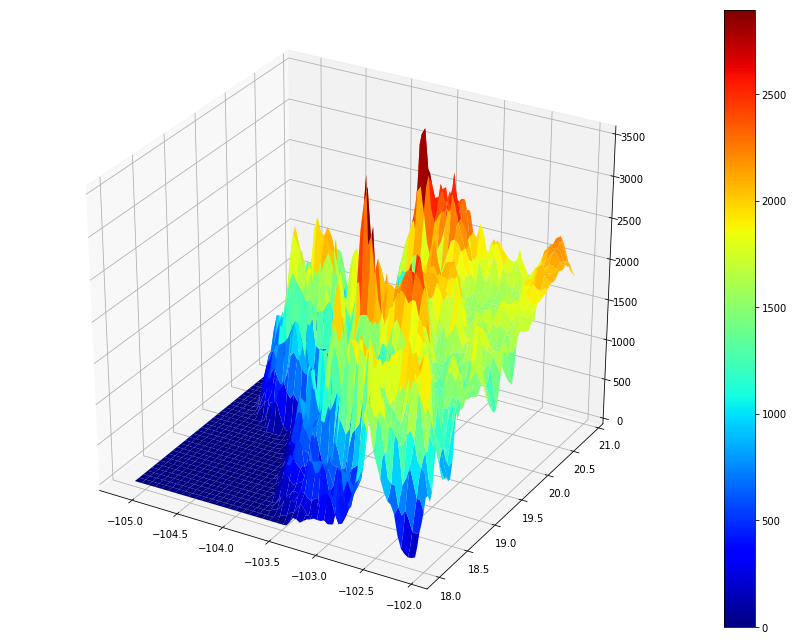

In [134]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

z = getvar(wrflist, "ter", timeidx=tt)
cont = ax.plot_surface(lons, lats, z.T, cmap=plt.cm.jet, linewidth=0.01)
plt.colorbar(cont)
plt.tight_layout()


numpy.datetime64('2013-03-03T09:00:00.000000000')

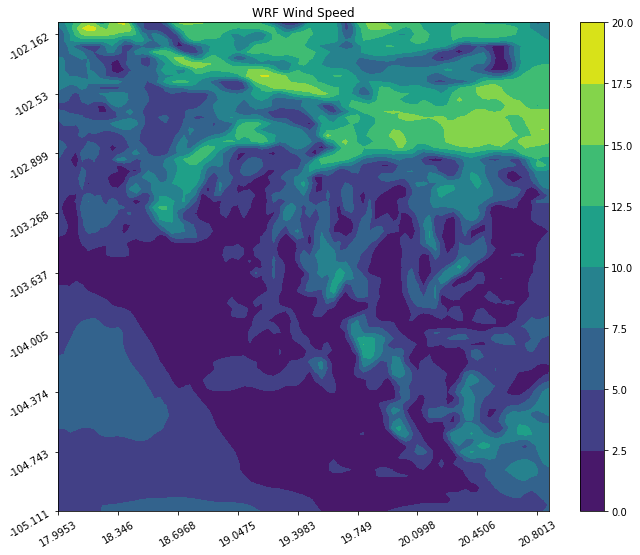

In [62]:
plt.figure(figsize=(11,9))
tt = 33
ll = 3
uvwrf, wdirwrf = getvar(wrflist, "uvmet_wspd_wdir", units="m s-1", timeidx=tt)
cont = plt.contourf(uvwrf[ll,:,:])
plt.colorbar(cont)

plt.xticks(np.arange(0,84,10),lats[::10].values, rotation=30);
plt.yticks(np.arange(0,81,10), lons[::10].values, rotation=30);
plt.title('WRF Wind Speed');
wrftime = getvar(wrflist, "times", timeidx=tt)
wrftime.values

numpy.datetime64('2013-03-03T09:00:00.000000000')

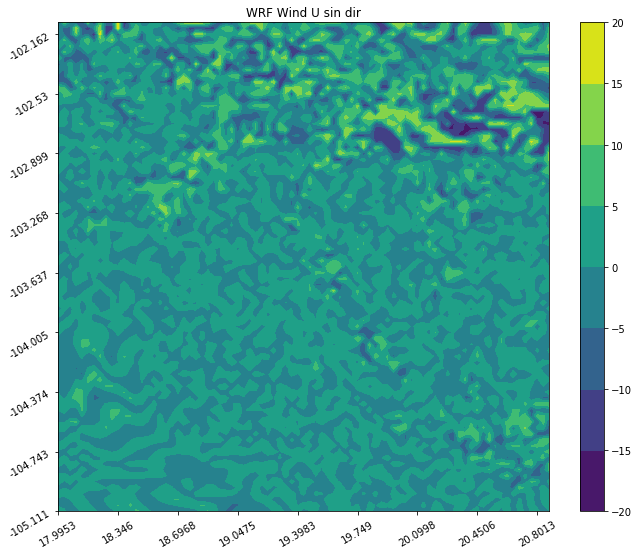

In [63]:
plt.figure(figsize=(11,9))
cont = plt.contourf(uvwrf[ll,:,:]*np.sin(wdirwrf[ll,:,:]))
plt.colorbar(cont)
plt.xticks(np.arange(0,84,10),lats[::10].values, rotation=30);
plt.yticks(np.arange(0,81,10), lons[::10].values, rotation=30);
plt.title('WRF Wind U sin dir');
wrftime = getvar(wrflist, "times", timeidx=tt)
wrftime.values

numpy.datetime64('2013-03-03T09:00:00.000000000')

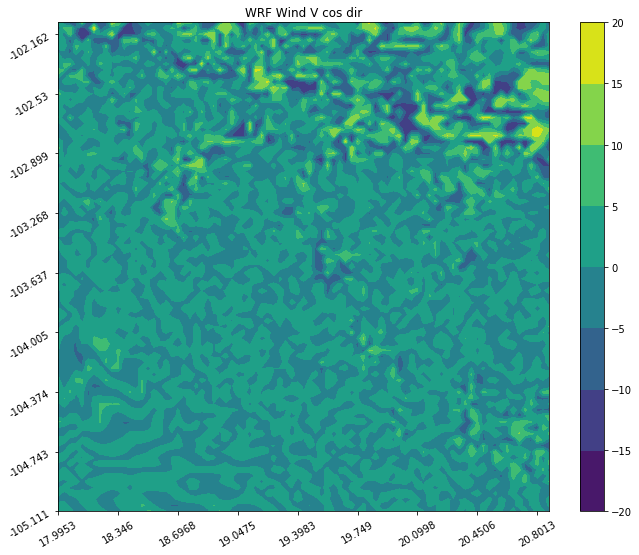

In [64]:
plt.figure(figsize=(11,9))
cont = plt.contourf(uvwrf[ll,:,:]*np.cos(wdirwrf[ll,:,:]))
plt.colorbar(cont)
plt.xticks(np.arange(0,84,10),lats[::10].values, rotation=30);
plt.yticks(np.arange(0,81,10), lons[::10].values, rotation=30);
plt.title('WRF Wind V cos dir');
wrftime = getvar(wrflist, "times", timeidx=tt)
wrftime.values

numpy.datetime64('2013-03-03T09:00:00.000000000')

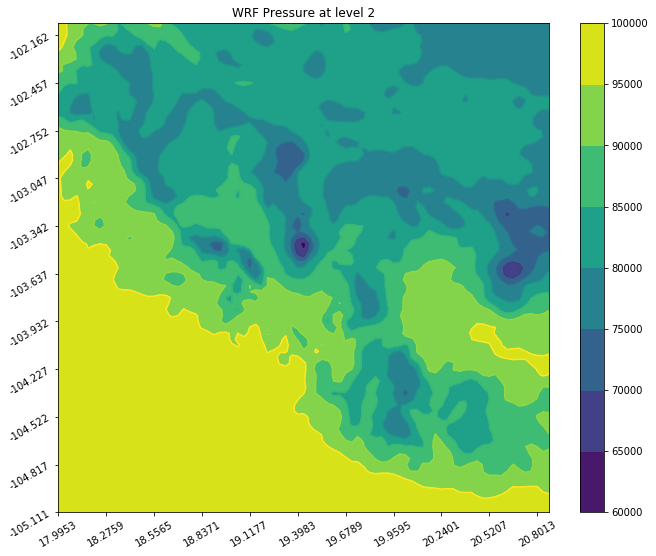

In [65]:
plt.figure(figsize=(11,9))
uvwrf = getvar(wrflist, "p", timeidx=tt)
cont = plt.contourf(uvwrf[ll,:,:])
plt.contour(uvwrf[ll,:,:])
plt.colorbar(cont)
plt.xticks(np.arange(0,84,8),lats[::8].values, rotation=30);
plt.yticks(np.arange(0,81,8), lons[::8].values, rotation=30);
plt.title('WRF Pressure at level 2');
wrftime = getvar(wrflist, "times", timeidx=tt)
wrftime.values

In [66]:
time = 
sodp = 

SyntaxError: invalid syntax (<ipython-input-66-475a1f0ac130>, line 1)

import pandas as pd
timeArraySod=np.arange(np.datetime64('2012-08-16 00:30'), np.datetime64('2013-04-11 00:30')
                       ,np.timedelta64(30,'m'))
#Variables to store data temporarily #238 dias * 48dt = 11424 times (11424 lineas de los tiempos, 98 niveles)
#spd=(pd.read_csv('wind', header=None, low_memory=False)).values.reshape((11424, 98))
#drc=(pd.read_csv('direc', header=None, low_memory=False)).values.reshape((11424, 98))
vte=(pd.read_csv('temp', header=None, low_memory=False)).values.reshape((11424, 98))
#(11424 lineas de los tiempos, 98 niveles)
#spd[spd>99.9] = np.nan
#drc[drc>999 ] = np.nan
vte[vte>999 ] = np.nan
colNames=["spd_"+str((i+3)*10) for i in range(98)] 
import numpy.ma as ma
#spd = np.where(np.isnan(spd), ma.array(spd, mask=np.isnan(spd)).mean(axis=0), spd) 
#sp=pd.DataFrame(data=spd, index=timeArraySod, columns=colNames, dtype=None)
#dd=pd.DataFrame(data=drc, index=timeArraySod, columns=colNames, dtype=None)
tv=pd.DataFrame(data=vte, index=timeArraySod, columns=colNames, dtype=None)
tv.to_pickle('sodar_tv.pk')